In [ ]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/heart.csv")

In [ ]:
#Display top 5 rows
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Columns
*   age
*   sex
    *   Value 1: male
    *   Value 2: female

*   chest pain type
    *   Value 0: typical angina
    *   Value 1: atypical angina
    *   Value 2: non-anginal pain
    *   Value 3: asymptomatic
    
*   trestbsp: resting blood pressure(in mm of hg)
*   chol: serum cholestrol in mm/dl
*   fbs: fasting blood suger > 120
    *   Value 0: false
    *   Value 1: true

*   restecg: resting electrocardiographic results
    *   Value 0: normal
    *   Value 1: having ST-T wave abnormality
    *   Value 2: showing probable or definite left ventricular hypertrophy

*   thalach: maximum heart rate achieved

*   exang: exercise induced angina
    *   Value 1: Yes
    *   Value 2: No
*   oldpeak: ST depression induced by exercise relative to rest
*   slpoe:sploe of peak exercise ST segment
    *   Value 1: upsloping
    *   Value 2: flat
    *   Value 3: downsloping

*   ca: number of major vessals colored by flourosopy
*   thal: 3=normal, 6=fixed, 7=reversable defect


*   target:
    *   Value 0: less chance of heart attack
    *   Value 1: more chance of heart attack






















In [ ]:
#Find shape of data
data.shape

(1025, 14)

In [ ]:
print("Number of rows: ",data.shape[0])
print("Number of columns: ",data.shape[1])

Number of rows:  1025
Number of columns:  14


In [ ]:
#Get information about data
data.info()

In [ ]:
#Check for null values
data.isnull().sum()

In [ ]:
#Get duplicate data and drop them
duplicate_data = data.duplicated().any()
print(duplicate_data)

In [ ]:
data = data.drop_duplicates()
data.shape

(302, 14)

In [ ]:
#Get overall statistics about data
data.describe()

In [ ]:
#Draw correaltion matrix
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot = True)

In [ ]:
#Count of people having heart disease and count of people don't having heart disease
data['target'].value_counts() #Output -> 0 => Not having heart disease, 1 => Having heart disease

1    164
0    138
Name: target, dtype: int64

In [ ]:
sns.countplot(x = 'target',data=data)
plt.xticks([0,1],["No Disease","Disease"])
plt.show()

In [ ]:
#Count male and female
data['sex'].value_counts() #Output -> 0=> Female, 1 => Male

1    206
0     96
Name: sex, dtype: int64

In [ ]:
sns.countplot(x ='sex',data=data)
plt.xticks([0,1],['Female','Male'])
plt.show()

In [ ]:
#Age distribution
sns.countplot(x='sex',hue='target',data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No disease','Disease'])
plt.show()

In [ ]:
#Age Distribution
sns.distplot(data['age'],bins=20)
plt.show()

In [ ]:
#Chest Pain type
sns.countplot(x='cp',data=data)
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non-anginal Pain',"Asymptomatic"])
plt.xticks(rotation=75)
plt.show()

In [ ]:
#Show chestpain Distribution as per target variable
sns.countplot(x='cp',hue='target',data=data)
plt.xticks([0,1,2,3],['Typical Angina','Atypical Angina','Non-anginal Pain',"Asymptomatic"])
plt.xticks(rotation=75)
plt.legend(labels=['No disease','Disease'])
plt.show()

In [ ]:
#Show fasting blood suger distribution according to target variable
sns.countplot(x='fbs',hue='target',data=data)
plt.xticks([0,1],["Yes","No"])
plt.legend(labels=['No disease','Disease'])
plt.show()

In [ ]:
#Show Resting blood suger distribution according to target variable
data['trestbps'].hist()

In [ ]:
#Compare Resting blood pressure as per sex
g = sns.FacetGrid(data,hue='sex',aspect=4)
g.map(sns.kdeplot,'trestbps',shade=True)
plt.legend(labels=['Males','Female'])

In [ ]:
#Show distribution of Serum cholestrol
data['chol'].hist()

In [ ]:
#Plot continuous variables
category = []
continouos = []
for column in data.columns:
  if data[column].nunique() <= 10:
    category.append(column)
  else:
    continouos.append(column)

In [ ]:
print("Categorical Values: ",category)
print("Continouos Values: ",continouos)

Categorical Values:  ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
Continouos Values:  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


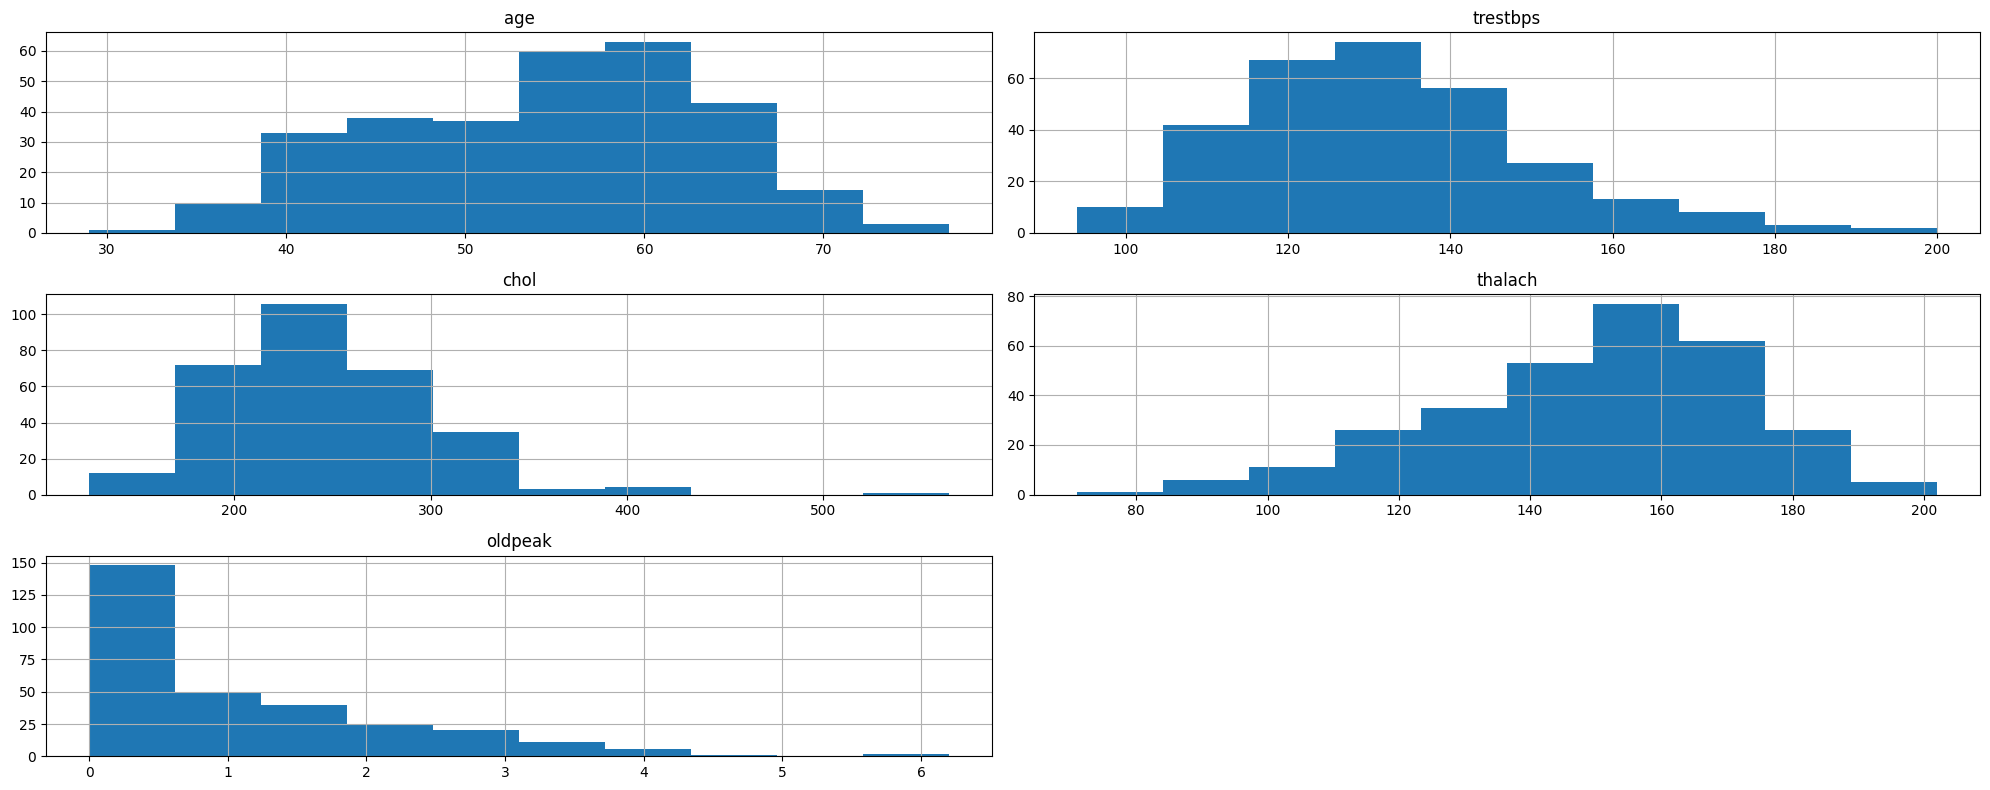

In [ ]:
data.hist(continouos,figsize=(20,8))
plt.tight_layout()
plt.show()